# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# IMPORTING NECESSARY LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING THE DATASET

In [2]:
df=pd.read_csv('insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Top 5 heads of the dataset.

In [3]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


Bottom 5 of the dataset.

In [4]:
df.shape

(1000, 40)

In [5]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


1000 rows and 40 columns in the dataset.

# CHECKING NULL VALUES IN THE DATASET

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In _c39 column there is 1000 missing values seems it is unnecessary column.

<AxesSubplot:>

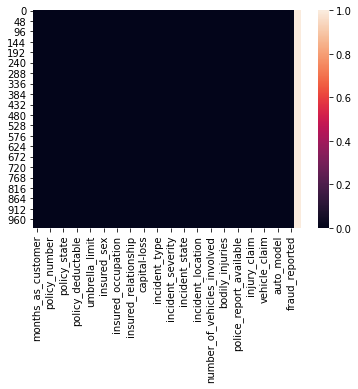

In [7]:
# Checking Null values through heatmap
sns.heatmap(df.isnull())

Last column is showing null values in the dataset.

# DROPPING UNNECESSARY COLUMN FROM THE DATASET

In [8]:
del df['_c39']

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
df.shape

(1000, 39)

Now we have 1000 rows and 39 columns

# CHECKING DATATYPES OF THE COLUMNS

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In dataset,  1 column is for float datatype, 17 columns is for integer datatype and 21 column is for object data type.

# VISUALIZATION OF NOMINAL DATA BY COUNT PLOT

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


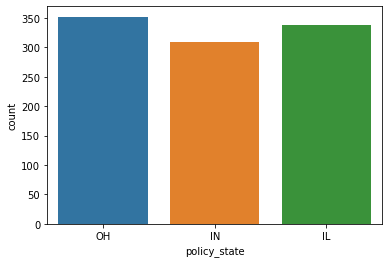

In [12]:
ax=sns.countplot(x='policy_state',data=df)
print(df['policy_state'].value_counts())

Not much difference between the unique values OH, IL and IN ,OH is with maximum number of counts that is 352.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


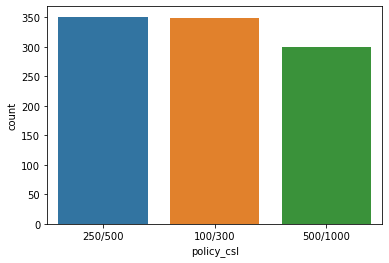

In [13]:
ax=sns.countplot(x='policy_csl',data=df)
print(df['policy_csl'].value_counts())

There is not much noticable difference in bars of policy_csl column, 250/500 is maximum number of counts that is 351.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


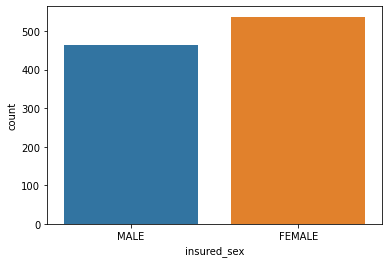

In [14]:
ax=sns.countplot(x='insured_sex',data=df)
print(df['insured_sex'].value_counts())

Female is maximum in value count than MALE ,The number of FEMALE is 537 and the number of MALE is 463.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


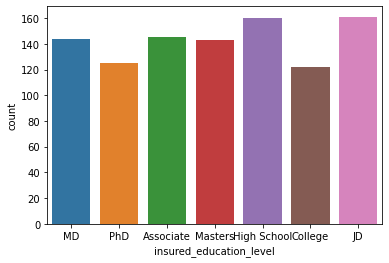

In [15]:
ax=sns.countplot(x='insured_education_level',data=df)
print(df['insured_education_level'].value_counts())

Not much noticable differnce in insured_education_level column, JD is 161 number of counts is maximum and college is 122 number of counts is minimum.

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


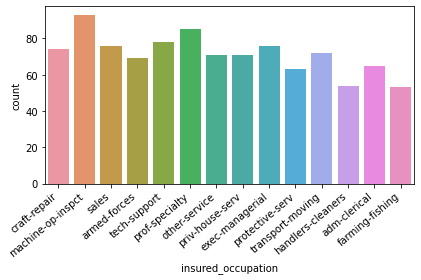

In [16]:
ax=sns.countplot(x='insured_occupation',data=df)
print(df['insured_occupation'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

There is not much noticable differnce in inusred occupation, the number of machine-op-inspct is 93 showing maximum number, and farming fishing is minimum that is 53.

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


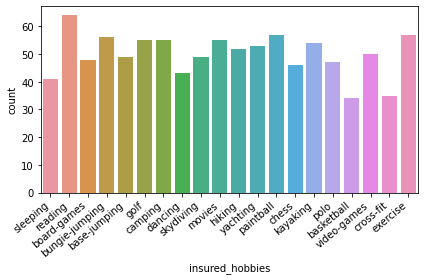

In [17]:
ax=sns.countplot(x='insured_hobbies',data=df)
print(df['insured_hobbies'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

There is not much noticable difference in insured_hobbies , reading hobby is maximum that is 64 and playing basketball hobby is minimum that 34.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


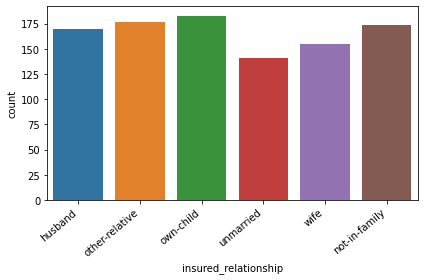

In [18]:
ax=sns.countplot(x='insured_relationship',data=df)
print(df['insured_relationship'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Insured with own-child is maximum is numbers that is 183 and unmarried insured are minimum that is 141 and there is not much difference in insured_relationship. 

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


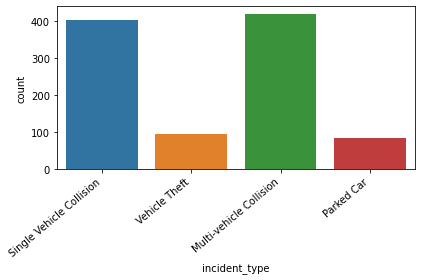

In [19]:
ax=sns.countplot(x='incident_type',data=df)
print(df['incident_type'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

There is 4 incident_type ,in Multi-vehicle Collision and Single Vehicle Collision there is not much difference , the number of count for Multi-vehicle Collision is 419  and the number of counts for single-vehicle Collision is 403.
In Vehicle Theft and parked car there is also not much differene Vehicle Theft is 94 and parked car is 84.

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


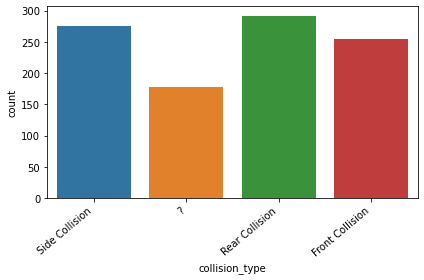

In [20]:
ax=sns.countplot(x='collision_type',data=df)
print(df['collision_type'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Rear collison is 292 showing maximum numbers and ? is 178 showing minimum numbers and there is not much difference in collision_type.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


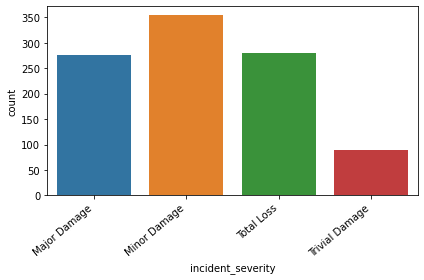

In [21]:
ax=sns.countplot(x='incident_severity',data=df)
print(df['incident_severity'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Minor Damage is more that is 354 Trivial damage is least that is 90, in Minor damage , Total Loss and Major Damage there is not much differnce.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


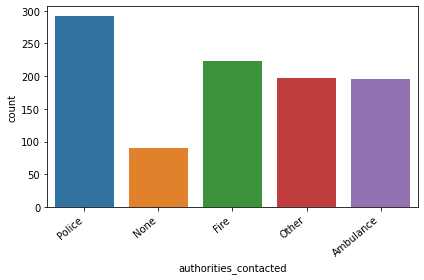

In [22]:
ax=sns.countplot(x='authorities_contacted',data=df)
print(df['authorities_contacted'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Police is more in numbers that is 292 and None is least in numbers that is 91.
In Police, Fire ,other authorities and Ambulance there is not much differnce.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


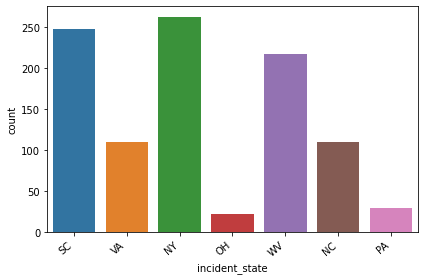

In [23]:
ax=sns.countplot(x='incident_state',data=df)
print(df['incident_state'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In NY(NEW YORK) there is more number of incident that is 262 qand in OH there is least number of incident that is 23.
In NY , SC , WV there is not much difference.
NC and VA is showing same number if incidents.
In PA and OH there is not much difference.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


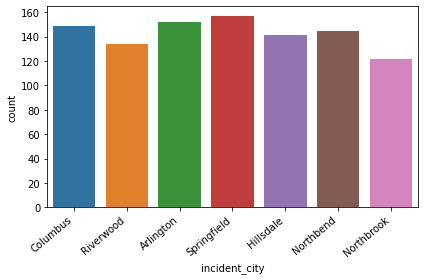

In [24]:
ax=sns.countplot(x='incident_city',data=df)
print(df['incident_city'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Incident City is showing not much noticable differnce between the cities, In Springfield there is maximum nuber of incident that is 157 and in Northbrook there is minimum number of incident that is 122.   

17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


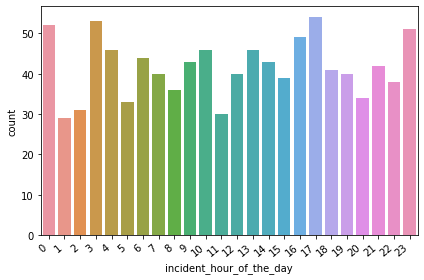

In [25]:
ax=sns.countplot(x='incident_hour_of_the_day',data=df)
print(df['incident_hour_of_the_day'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

17 hours is maximum that is 54 and 1 hour is minimum that is 29 and there is not much difference in incident_hour_of_the_day.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


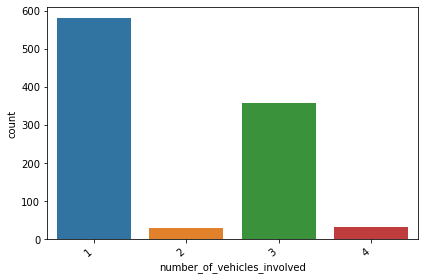

In [26]:
ax=sns.countplot(x='number_of_vehicles_involved',data=df)
print(df['number_of_vehicles_involved'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

The involvement of 1 vehicle is more that 581 and the 2 vehicle is least that is 30.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


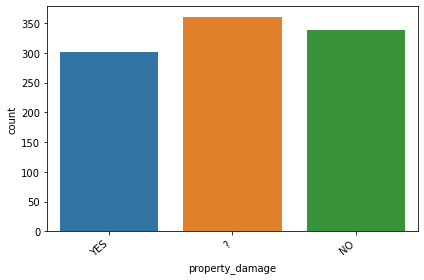

In [27]:
ax=sns.countplot(x='property_damage',data=df)
print(df['property_damage'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

? is maximum that is 360 , Yes is showing 338 for property damage and No is showing 302 for property damage.

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


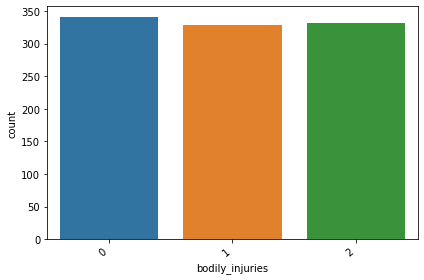

In [28]:
ax=sns.countplot(x='bodily_injuries',data=df)
print(df['bodily_injuries'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In bodily_injuries there is not much difference between 0,2 and 1 and 0 is maximum that 3
340 and 1 is minimum that is 328.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


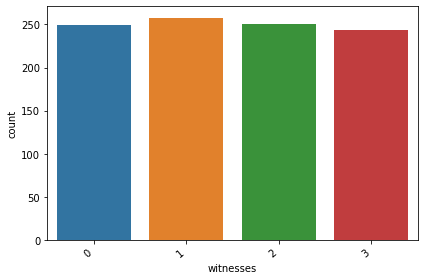

In [29]:
ax=sns.countplot(x='witnesses',data=df)
print(df['witnesses'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Incident having 1 witness is more that is 352 and incident having 3 witnesses i least that 243 and there is not much difference in Witnesses. 

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


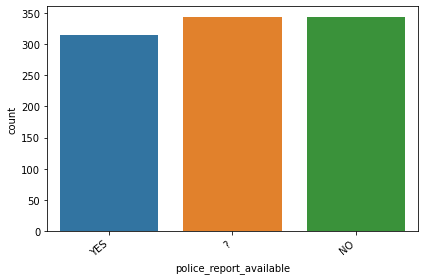

In [30]:
ax=sns.countplot(x='police_report_available',data=df)
print(df['police_report_available'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

? and No is showing same numbers of police_report_available that is 343 , and Yes police_report_available is 314.

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


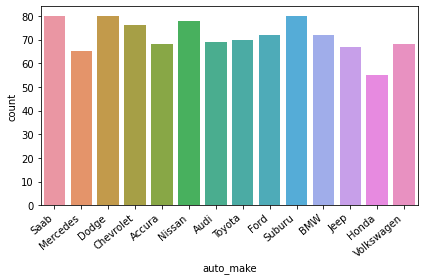

In [31]:
ax=sns.countplot(x='auto_make',data=df)
print(df['auto_make'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Dodge is showing more for auto_make that is 80 and Honda is showing least that is 55 and there i not much differnce in auto_make.

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
E400              27
95                27
F150              27
Grand Cherokee    25
93                25
Escape            24
Tahoe             24
Maxima            24
X5                23
Ultima            23
Highlander        22
Civic             22
Silverado         22
Fusion            21
CRV               20
Impreza           20
Corolla           20
ML350             20
TL                20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


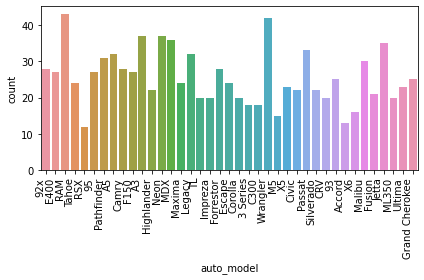

In [32]:
ax=sns.countplot(x='auto_model',data=df)
print(df['auto_model'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

auto_model RAM is more that is 43 and auto_model RSX is least that is 12.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


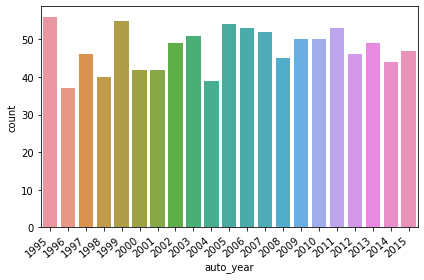

In [33]:
ax=sns.countplot(x='auto_year',data=df)
print(df['auto_year'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

56 auto was in year 1995 showing maximum in numbers and 37 auto was in year 1996 showing minimum.

N    753
Y    247
Name: fraud_reported, dtype: int64


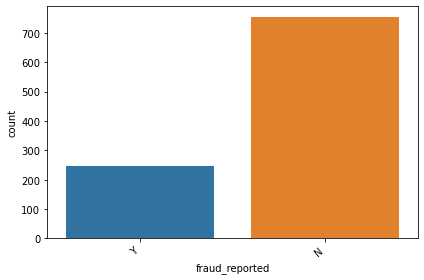

In [34]:
ax=sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

IN ,fraud_reported column Y is showing least number that is 247 and Nis showing 753 that is maximum number and the column is also showing the imbalancemnt between Y and N.

# CHECKING THE DISTRIBUTION OF THE FLOAT AND INTEGER TYPE COLUMNS

In [35]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

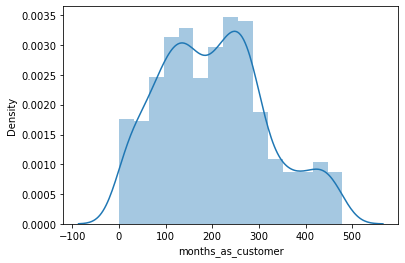

In [36]:
sns.distplot(df['months_as_customer'], kde=True)

months_as_customer column is looking normally distributed.

<AxesSubplot:xlabel='age', ylabel='Density'>

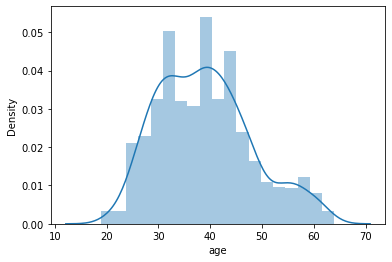

In [37]:
sns.distplot(df['age'],kde=True)

Age column is looking normally distributed ranges between 20 to 65.

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

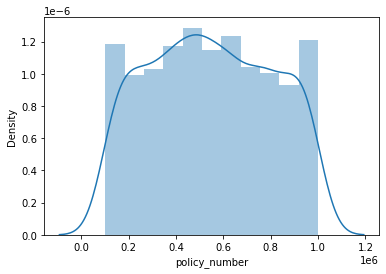

In [38]:
sns.distplot(df['policy_number'],kde=True)

policy_number column is looking normally distributed.

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

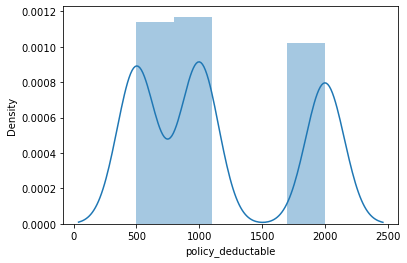

In [39]:
sns.distplot(df['policy_deductable'],kde=True)

policy_deductable column is showing distribution in two groups 0 to 1500 and 1500 to 2500.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

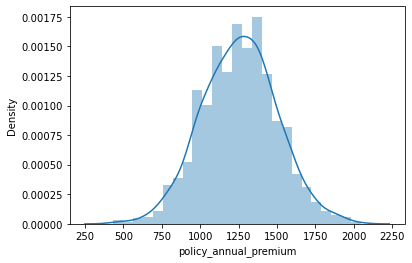

In [40]:
sns.distplot(df['policy_annual_premium'],kde=True)

policy_annual_premium column is looking normally distributed ranges between 250 to 2250.

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

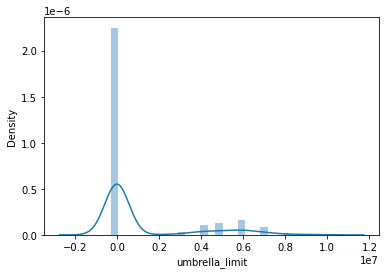

In [41]:
sns.distplot(df['umbrella_limit'],kde=True)

umbrella_limit is looking left skewed .

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

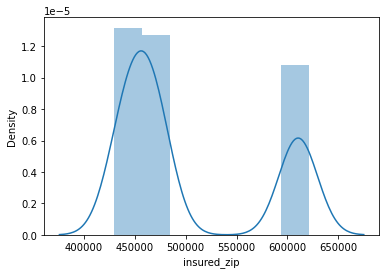

In [42]:
sns.distplot(df['insured_zip'],kde=True)

insured_zip column is showing distribution in two groups from 400000 to approx 550000 and 550000 to 650000.

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

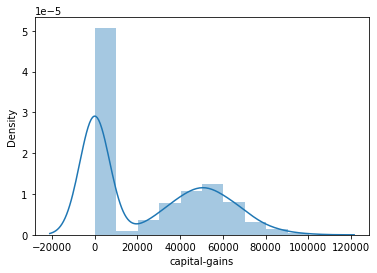

In [43]:
sns.distplot(df['capital-gains'],kde=True)

capital-gains is not looking normally distributed. Its ranges from 0to 100000.

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

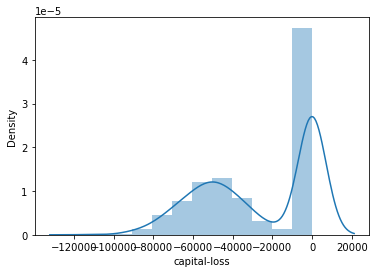

In [44]:
sns.distplot(df['capital-loss'],kde=True)

capital-loss is not looking normally distributed its looking like right skewed and its ranges from 0 to approx -80000.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

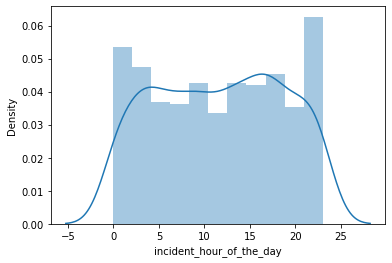

In [45]:
sns.distplot(df['incident_hour_of_the_day'],kde=True)

incident_hour_of_the_day column is looking normally distributed ranges from 0 to approx 23.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

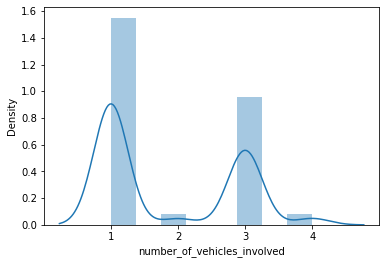

In [46]:
sns.distplot(df['number_of_vehicles_involved'],kde=True)

number_of_vehicles_involved  is showing distribution in two group tanges from 1 to approx 2 and approx 3 to 4.

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

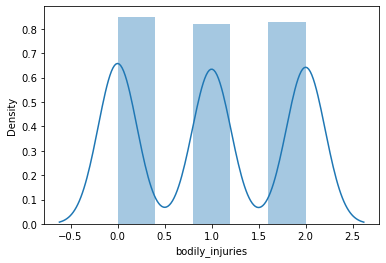

In [47]:
sns.distplot(df['bodily_injuries'],kde=True)

bodily_injuries columns is showing 3 groups with equally distribution.

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

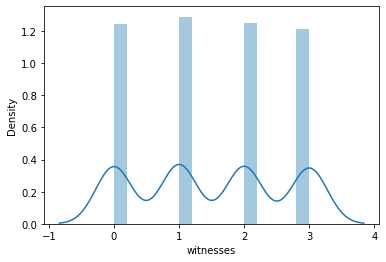

In [48]:
sns.distplot(df['witnesses'],kde=True)

There is 4 groups of witnesses with equally distribution.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

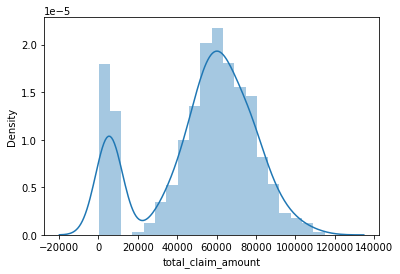

In [49]:
sns.distplot(df['total_claim_amount'],kde=True)

total_claim_amount column not looking normally ditributed ranges from 0 to 120000.

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

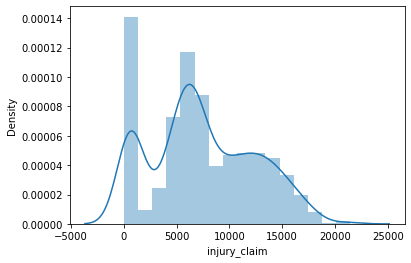

In [50]:
sns.distplot(df['injury_claim'],kde=True)

injury claim is looking liitle bit lefet skewed ranges from 0 to approx 20000.

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

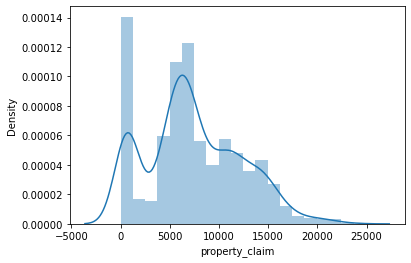

In [51]:
sns.distplot(df['property_claim'],kde=True)

property_claim column is looking left skewed ranges from  to approx 25000.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

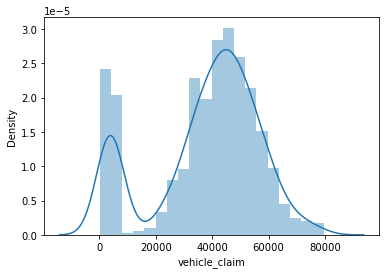

In [52]:
sns.distplot(df['vehicle_claim'],kde=True)

vehicle_claim is showing distributions in down and up that is from 0 to 20000 and 20000 to 80000.

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

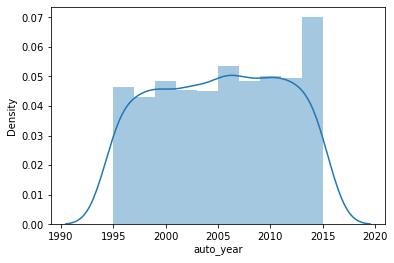

In [53]:
sns.distplot(df['auto_year'],kde=True)

auto_year column is looking normally distributed ranges from 1995 to 2015.

# BIVARIATE ANALYSIS

In [54]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:title={'center':' comparison between age  and insured_sex'}, xlabel='age', ylabel='insured_sex'>

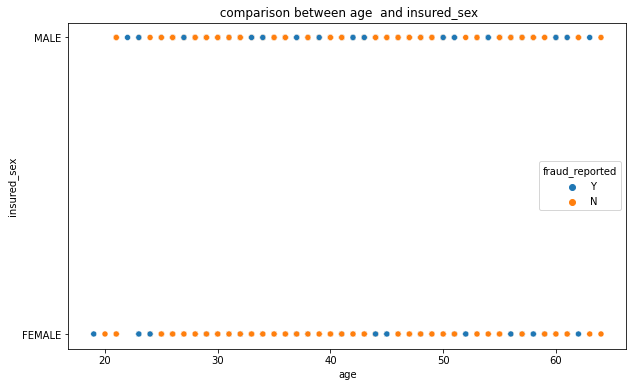

In [55]:
plt.figure(figsize=[10,6])
plt.title(' comparison between age  and insured_sex')
sns.scatterplot(df['age'], df['insured_sex'],hue=df['fraud_reported'])

scatterplot is showing between age goups of 30 to 40 in female there is noo fraud detected.
and in male number of fraud detected is more than the female.

<AxesSubplot:title={'center':' comparison between total_claim_amount  and insured_sex'}, xlabel='total_claim_amount', ylabel='insured_sex'>

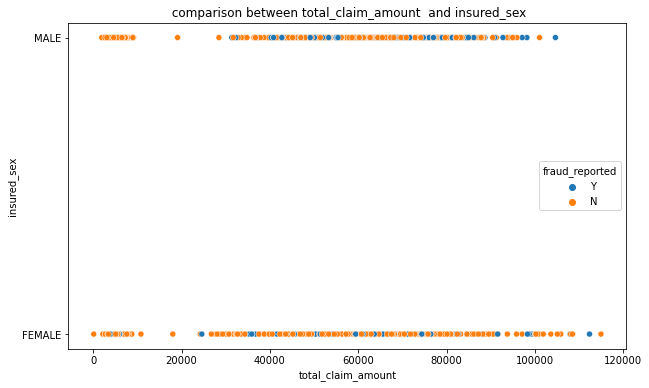

In [56]:
plt.figure(figsize=[10,6])
plt.title(' comparison between total_claim_amount  and insured_sex')
sns.scatterplot(df['total_claim_amount'], df['insured_sex'],hue=df['fraud_reported'])

In male there is not much claim_amount fraud from 60000 to 80000, there is sopme claim_amouunt in male from 40000 to 60000.

<AxesSubplot:title={'center':' comparison between injury_claim  and insured_sex'}, xlabel='injury_claim', ylabel='insured_sex'>

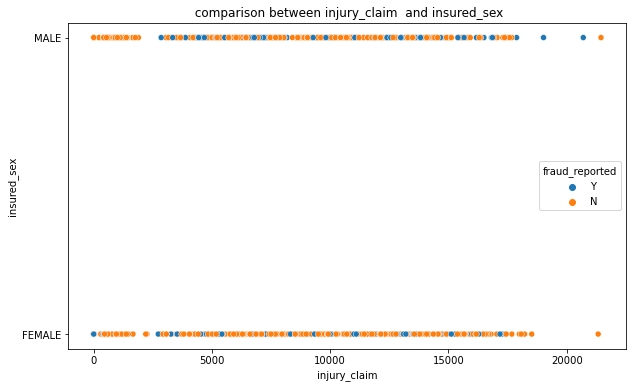

In [57]:
plt.figure(figsize=[10,6])
plt.title(' comparison between injury_claim  and insured_sex')
sns.scatterplot(df['injury_claim'], df['insured_sex'],hue=df['fraud_reported'])

injury_claim fraud is more in male than female.

<AxesSubplot:title={'center':' comparison between property_claim  and insured_sex'}, xlabel='property_claim', ylabel='insured_sex'>

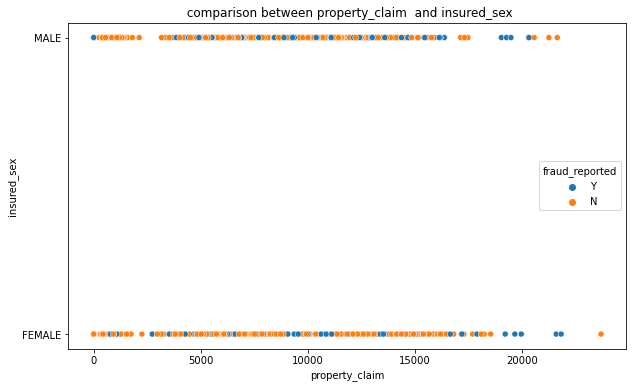

In [58]:
plt.figure(figsize=[10,6])
plt.title(' comparison between property_claim  and insured_sex')
sns.scatterplot(df['property_claim'], df['insured_sex'],hue=df['fraud_reported'])

property_claim fraud is less in female than male.

<AxesSubplot:title={'center':' comparison between vehicle_claim  and insured_sex'}, xlabel='vehicle_claim', ylabel='insured_sex'>

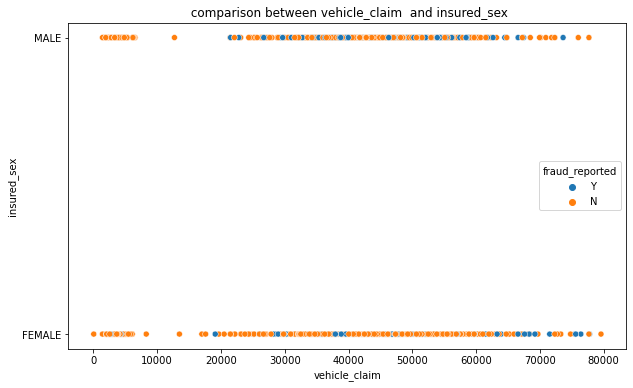

In [59]:
plt.figure(figsize=[10,6])
plt.title(' comparison between vehicle_claim  and insured_sex')
sns.scatterplot(df['vehicle_claim'], df['insured_sex'],hue=df['fraud_reported'])

In vehicle_claim_ammout from 40000 to 65000 there is no any claim fraud from feamle and male fraud_reported is more than female. 

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
enc=LabelEncoder()
for i in df.columns:
    
        if df[i].dtypes=='object':
            df[i]=enc.fit_transform(df[i])
            

In [62]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


Now all the object type columns has been converted into numeric columns.

# CHECKING OUTLIERS THROUGH BOXPLOT

months_as_customer                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
age                            AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
policy_number                  AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
policy_bind_date               AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
policy_state                   AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
policy_csl                     AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
policy_deductable              AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
policy_annual_premium          AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
umbrella_limit                    AxesSubplot(0.125,0.593621;0.0824468x0.130172)
insured_zip                    AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
insured_sex                    AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
insured_education_level        AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
insured_occupation          

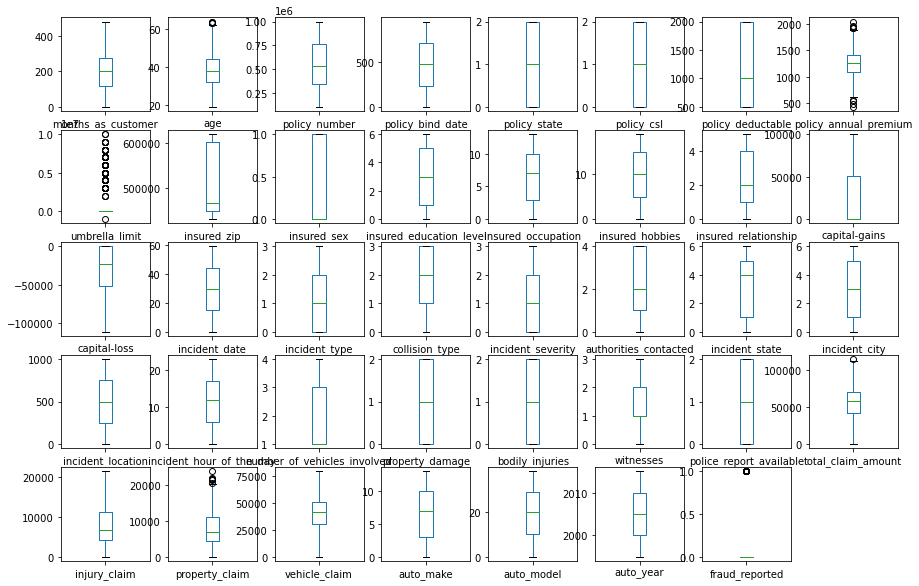

In [63]:
df.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

The columns having an outlier is age, policy_annual_premium, umbrella_limit, prperty_claim and fraud_reported.
so fraud_repored is the target columns so outliers wont be removed.

# CHECKING SKEWNESS

In [64]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


columns is in range between +.5 and -.5 are not skewed.
skewed columns are:
    
    umbrella_limit
    
    insured_zip
    
    fraud_reported(target columns)
    
    it seems our dataset is not much skewed.
    
    



# STATISTICAL SUMMARY

In [65]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<AxesSubplot:>

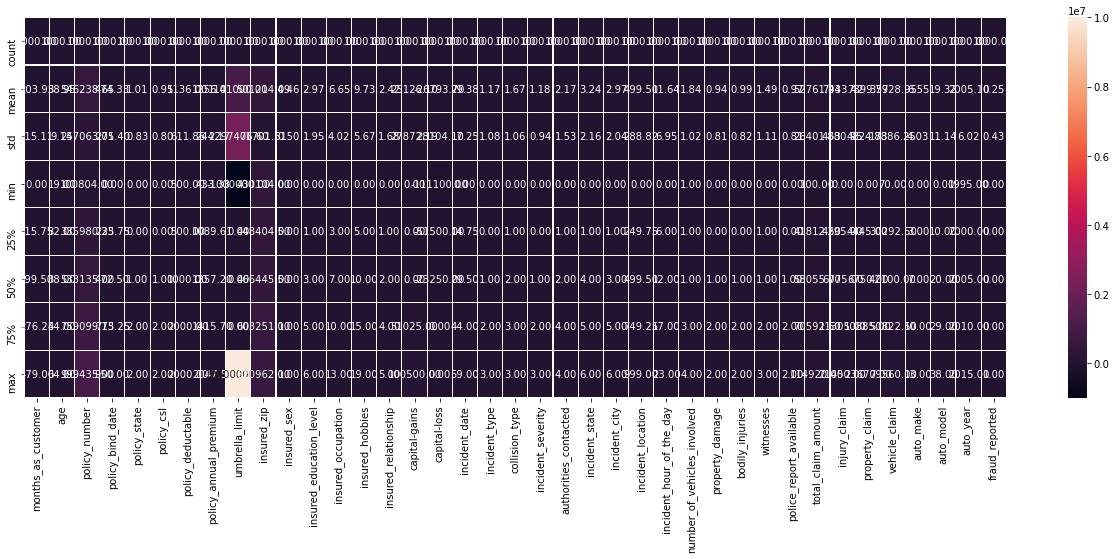

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths =0.1,fmt='0.2f')

Count is same in every columns.

mean and median is approx same in every columns.

There is some differnce between 75th percentile and maximum in some columns but not much.


# CORRELATION MATRIX

<AxesSubplot:>

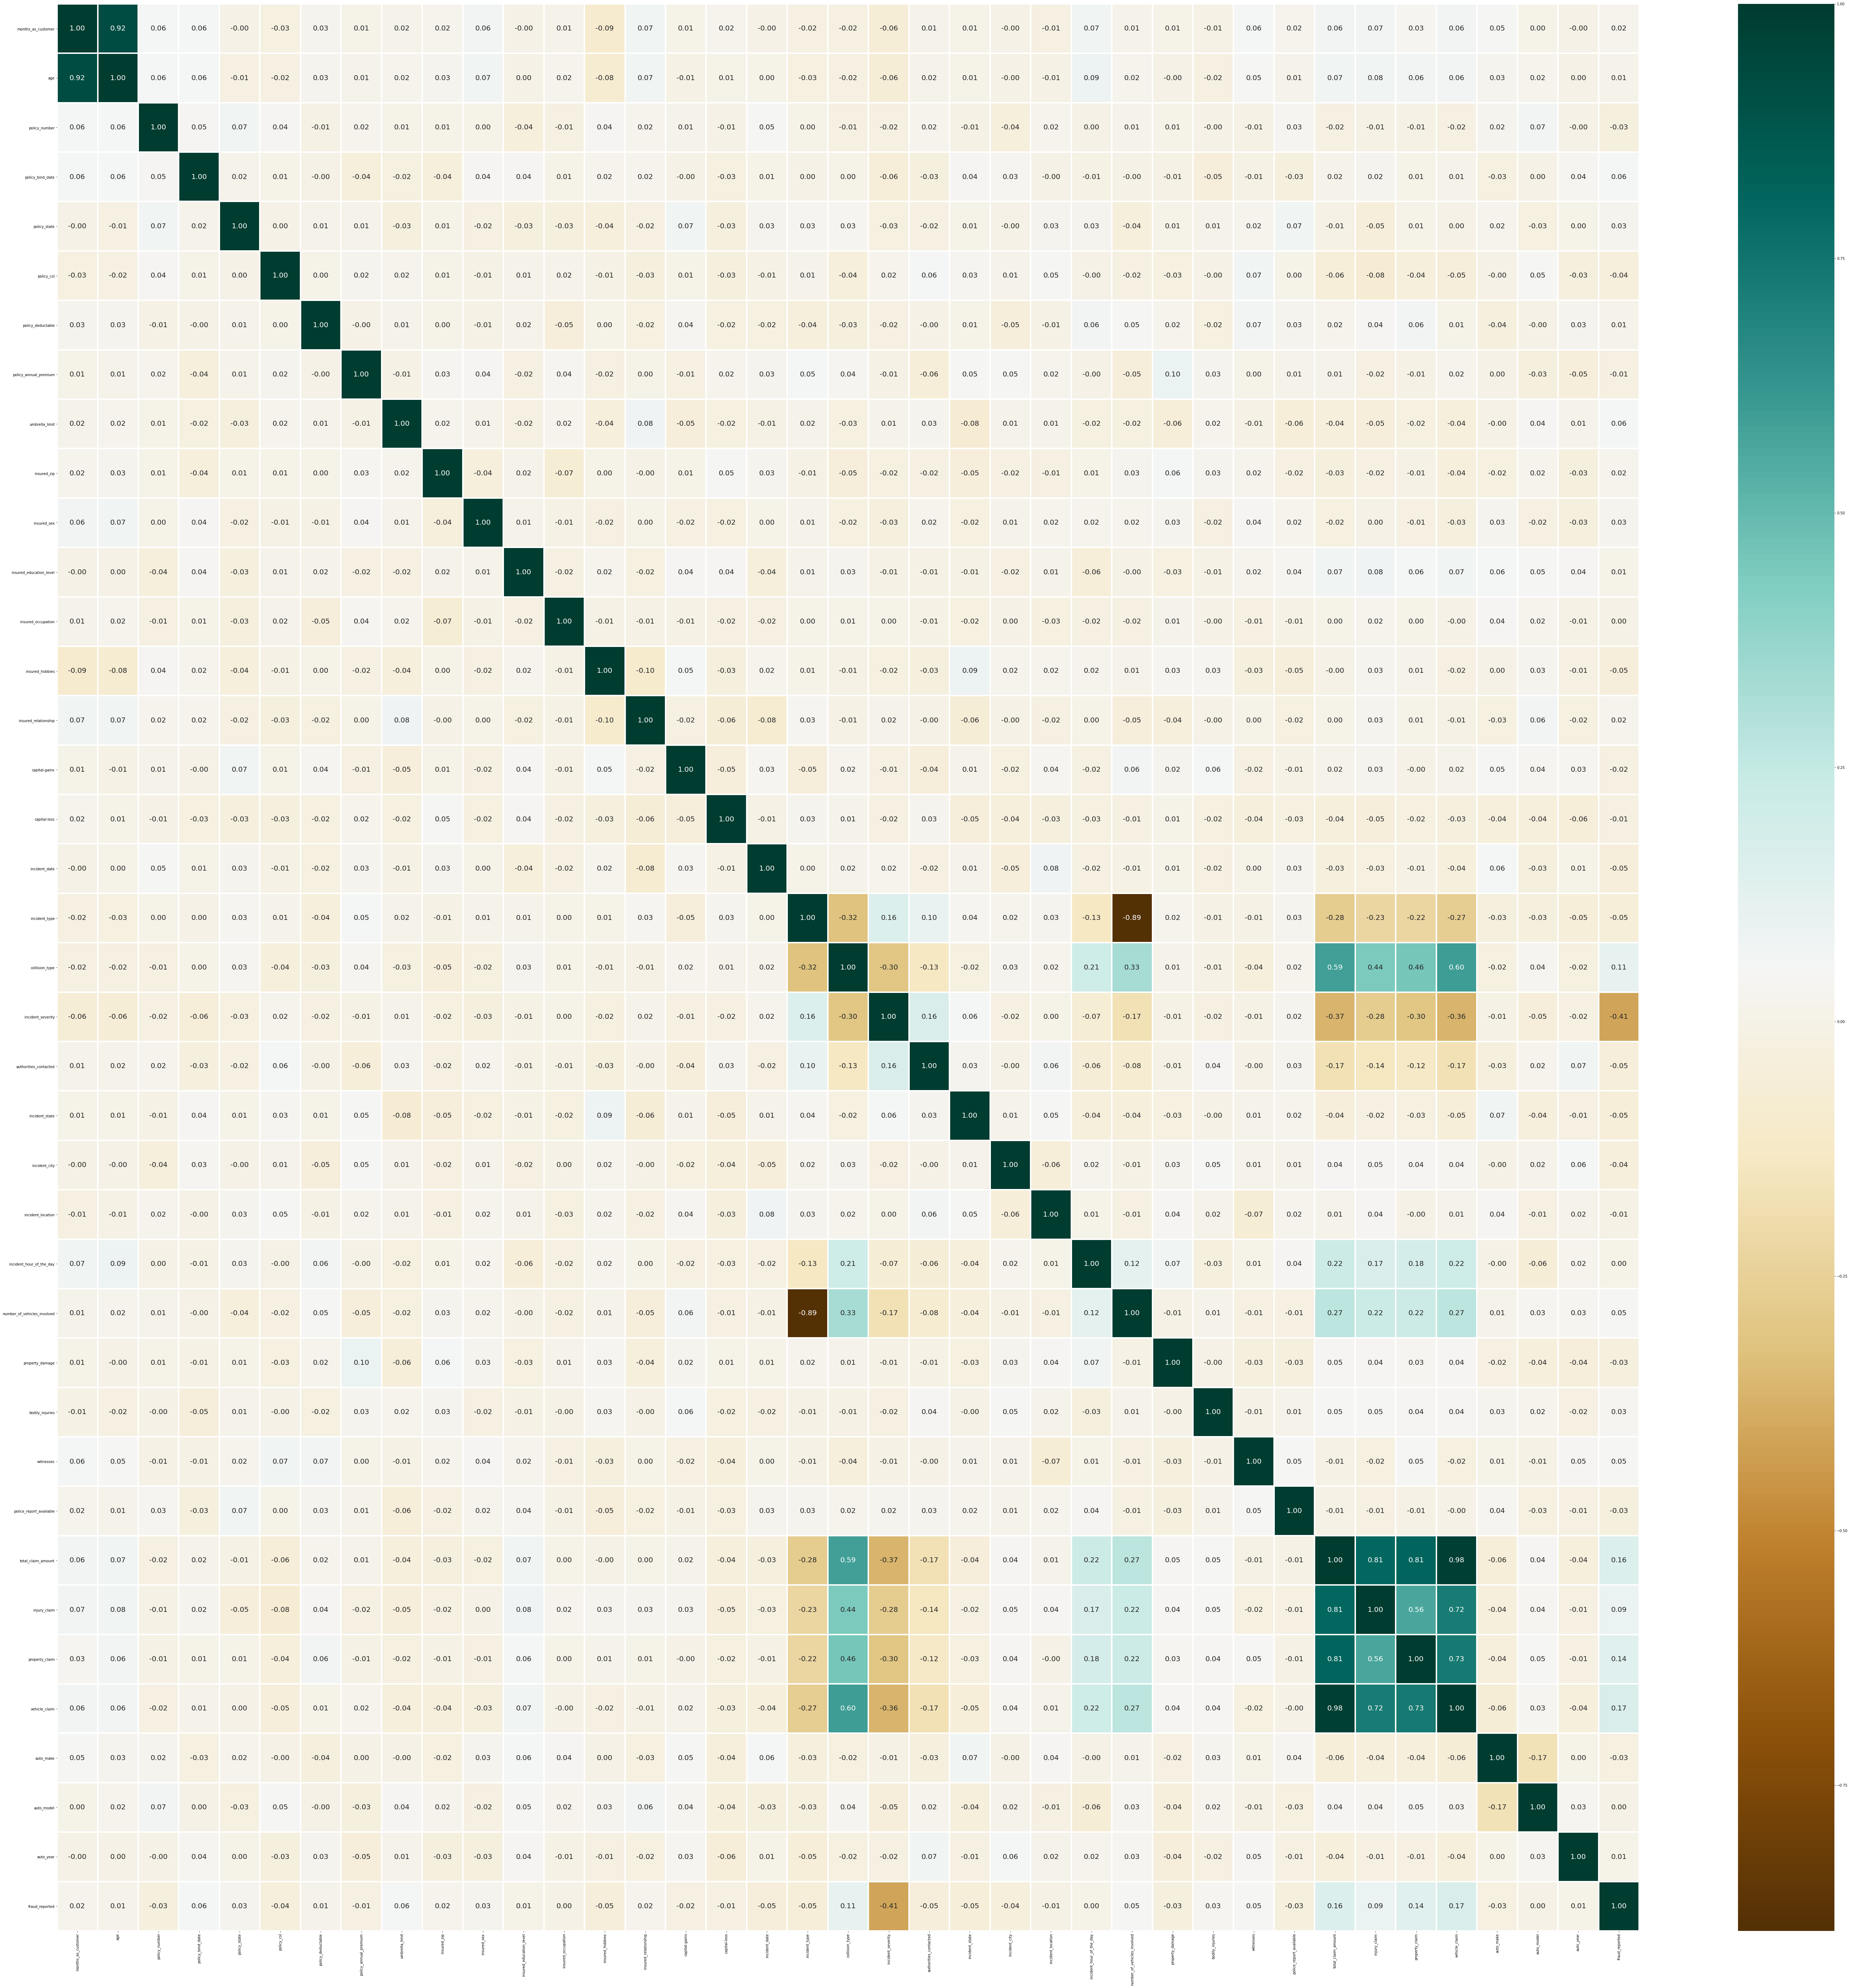

In [67]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True,linewidths =3,fmt='0.2f',cmap="BrBG",annot_kws={"size":20})

Heatmap is not much visible due to more number of columns.

In [68]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


Other columns is showing weak correltations with target column fraud_detected.

number of vehicle involved is showing negative correlation with the incident_type column.

vehicle claim is showing positive correlation with total claim amount  and injury claim.




# OUTLIER REMOVAL

In [69]:
from scipy.stats import zscore

In [70]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [71]:
df_=df[(z<3).all(axis=1)]


In [72]:
df_

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [73]:
df.shape

(1000, 39)

In [74]:
df_.shape

(980, 39)

In [75]:
df_.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

 So 2 rows has been removed as a outliers.

# CHECKING SKEWNESS AGAIN

In [76]:
df_.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


so some of the skewness is removed during outlier removal, not removing more skewnes due to chances of data loss.

# SEPRATING THE COLUMNS INTO X AND Y

In [77]:
x=df_.drop('fraud_reported', axis=1)
y=df_['fraud_reported']

In [78]:
x.shape

(980, 38)

In [79]:
y.shape

(980,)

# HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [80]:
# in target column there is more differnce between yes and no
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)

In [81]:
y_over.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

Not data is equal.

# TRAIN TEST SPLIT

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(735, 38)
(245, 38)
(735,)
(245,)


# MODEL BUILDING

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [85]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.7306122448979592
[[178   0]
 [ 66   1]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       178
           1       1.00      0.01      0.03        67

    accuracy                           0.73       245
   macro avg       0.86      0.51      0.44       245
weighted avg       0.80      0.73      0.62       245



In [86]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7540816326530612


Accuracy score is 73% and cv score is 75% of Logistic Reression.

In [87]:
# AUC ROC CURVE Logistic Regression
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

In [88]:
y_pred_proba

array([0.34994874, 0.24587915, 0.14823875, 0.20515378, 0.22385811,
       0.21925431, 0.19355751, 0.20007011, 0.15763052, 0.23084096,
       0.16090227, 0.10103063, 0.2615311 , 0.26728806, 0.34010201,
       0.29054946, 0.35724667, 0.32415396, 0.19475201, 0.09975328,
       0.22660463, 0.19823519, 0.19129786, 0.23083542, 0.25905306,
       0.29964627, 0.18849983, 0.14474587, 0.3935217 , 0.23864762,
       0.29667627, 0.14020979, 0.27316559, 0.14204684, 0.33644733,
       0.12670957, 0.19450569, 0.19374269, 0.13044769, 0.20872023,
       0.26018228, 0.29786731, 0.32339936, 0.14687313, 0.29379969,
       0.34237135, 0.29949559, 0.15622912, 0.22218921, 0.15975963,
       0.11627233, 0.19730325, 0.19745518, 0.18321276, 0.19845291,
       0.22080798, 0.16967553, 0.20851786, 0.17372336, 0.26841505,
       0.20840284, 0.3331074 , 0.3047862 , 0.24594794, 0.19660552,
       0.38967794, 0.09180875, 0.19418166, 0.30396957, 0.31527482,
       0.44107137, 0.33298337, 0.12279598, 0.19533287, 0.23149

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr
tpr

array([0.        , 0.01492537, 0.02985075, 0.02985075, 0.04477612,
       0.04477612, 0.10447761, 0.10447761, 0.11940299, 0.11940299,
       0.13432836, 0.13432836, 0.17910448, 0.17910448, 0.20895522,
       0.20895522, 0.23880597, 0.23880597, 0.25373134, 0.25373134,
       0.26865672, 0.26865672, 0.29850746, 0.29850746, 0.31343284,
       0.31343284, 0.32835821, 0.32835821, 0.34328358, 0.34328358,
       0.35820896, 0.35820896, 0.37313433, 0.37313433, 0.41791045,
       0.41791045, 0.43283582, 0.43283582, 0.44776119, 0.44776119,
       0.46268657, 0.46268657, 0.49253731, 0.49253731, 0.50746269,
       0.50746269, 0.53731343, 0.53731343, 0.55223881, 0.55223881,
       0.58208955, 0.58208955, 0.59701493, 0.59701493, 0.6119403 ,
       0.6119403 , 0.65671642, 0.65671642, 0.67164179, 0.67164179,
       0.68656716, 0.68656716, 0.71641791, 0.71641791, 0.73134328,
       0.73134328, 0.74626866, 0.74626866, 0.76119403, 0.76119403,
       0.79104478, 0.79104478, 0.80597015, 0.80597015, 0.82089

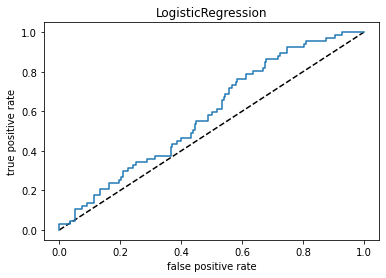

In [90]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

In [91]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.5074626865671642


Auc_score of Logistic Regression is 50%.

In [92]:
# AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.7836734693877551
[[162  16]
 [ 37  30]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       178
           1       0.65      0.45      0.53        67

    accuracy                           0.78       245
   macro avg       0.73      0.68      0.70       245
weighted avg       0.77      0.78      0.77       245



In [93]:
#For AdaBoostClassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7816326530612245


Accuracy score is 78% and cv score is 78.16% of adaboost classifier

In [94]:
# AUC ROC CURVE adaboost classifier
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]


In [95]:
y_pred_prob

array([0.48454885, 0.50906831, 0.47951542, 0.47488759, 0.50256545,
       0.48718656, 0.48047897, 0.4981969 , 0.47289028, 0.48617847,
       0.50329715, 0.47475333, 0.38985014, 0.47944157, 0.46919227,
       0.50453049, 0.51822285, 0.50795485, 0.50053827, 0.47960808,
       0.48589056, 0.49495927, 0.48326001, 0.48097835, 0.48300394,
       0.48095156, 0.50905801, 0.49645869, 0.48573711, 0.50139313,
       0.48060406, 0.49463227, 0.47248507, 0.48879424, 0.48273044,
       0.48272938, 0.50740891, 0.4744233 , 0.47095498, 0.49582396,
       0.48609483, 0.48282519, 0.50688271, 0.49358482, 0.51144294,
       0.49951935, 0.49585416, 0.48261609, 0.48914976, 0.47966763,
       0.49227673, 0.47817328, 0.47966237, 0.48710377, 0.4822706 ,
       0.4737027 , 0.48049964, 0.47961993, 0.47480272, 0.50980688,
       0.49551936, 0.50520259, 0.47979374, 0.50742351, 0.48168927,
       0.48110462, 0.46512658, 0.48949002, 0.48708671, 0.49364892,
       0.48885435, 0.47944249, 0.50771583, 0.49497817, 0.49139

In [96]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.        , 0.        , 0.01492537, 0.01492537,
       0.13432836, 0.13432836, 0.19402985, 0.19402985, 0.2238806 ,
       0.2238806 , 0.23880597, 0.23880597, 0.25373134, 0.25373134,
       0.26865672, 0.26865672, 0.34328358, 0.34328358, 0.35820896,
       0.35820896, 0.41791045, 0.41791045, 0.44776119, 0.44776119,
       0.47761194, 0.47761194, 0.50746269, 0.50746269, 0.52238806,
       0.52238806, 0.53731343, 0.53731343, 0.55223881, 0.55223881,
       0.59701493, 0.59701493, 0.62686567, 0.62686567, 0.65671642,
       0.65671642, 0.67164179, 0.67164179, 0.70149254, 0.70149254,
       0.71641791, 0.71641791, 0.73134328, 0.73134328, 0.79104478,
       0.79104478, 0.80597015, 0.80597015, 0.82089552, 0.82089552,
       0.8358209 , 0.8358209 , 0.85074627, 0.85074627, 0.86567164,
       0.86567164, 0.88059701, 0.88059701, 0.89552239, 0.89552239,
       0.91044776, 0.91044776, 0.95522388, 0.95522388, 0.97014925,
       0.97014925, 1.        , 1.        ])

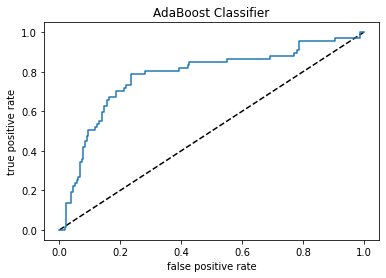

In [97]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [98]:
auc_score=roc_auc_score(y_test,ad.predict(x_test))
print(auc_score)

0.6789367767902063


Auc_score of Adaboost Classifier is 67%.

In [99]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.763265306122449
[[171   7]
 [ 51  16]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       178
           1       0.70      0.24      0.36        67

    accuracy                           0.76       245
   macro avg       0.73      0.60      0.61       245
weighted avg       0.75      0.76      0.72       245



In [100]:
# Random FOrest Cross Validation

scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7714285714285714


Accuracy score is 76% and cv score is 77% of Random Forest Classifier.

In [101]:
# AUC ROC CURVE RANDOM FOREST CLASSIFIER
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]


In [102]:
y_pred_prob

array([0.21, 0.54, 0.03, 0.08, 0.46, 0.11, 0.04, 0.42, 0.1 , 0.02, 0.52,
       0.12, 0.09, 0.33, 0.26, 0.37, 0.48, 0.57, 0.43, 0.08, 0.29, 0.37,
       0.18, 0.12, 0.27, 0.08, 0.4 , 0.36, 0.19, 0.36, 0.09, 0.35, 0.16,
       0.11, 0.27, 0.29, 0.44, 0.13, 0.05, 0.15, 0.25, 0.07, 0.51, 0.2 ,
       0.51, 0.32, 0.33, 0.1 , 0.26, 0.05, 0.23, 0.07, 0.11, 0.29, 0.14,
       0.14, 0.14, 0.24, 0.3 , 0.41, 0.24, 0.64, 0.29, 0.53, 0.1 , 0.19,
       0.13, 0.1 , 0.04, 0.14, 0.12, 0.1 , 0.62, 0.48, 0.09, 0.43, 0.21,
       0.04, 0.52, 0.13, 0.34, 0.23, 0.13, 0.56, 0.12, 0.05, 0.19, 0.21,
       0.07, 0.13, 0.23, 0.29, 0.11, 0.16, 0.17, 0.04, 0.12, 0.23, 0.59,
       0.14, 0.51, 0.17, 0.31, 0.26, 0.6 , 0.49, 0.07, 0.07, 0.06, 0.54,
       0.54, 0.24, 0.17, 0.17, 0.17, 0.04, 0.13, 0.19, 0.02, 0.1 , 0.19,
       0.25, 0.2 , 0.36, 0.49, 0.05, 0.53, 0.25, 0.43, 0.33, 0.13, 0.52,
       0.48, 0.56, 0.6 , 0.17, 0.05, 0.19, 0.2 , 0.16, 0.13, 0.28, 0.48,
       0.36, 0.42, 0.49, 0.22, 0.42, 0.42, 0.19, 0.

In [103]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.01492537, 0.05970149, 0.07462687, 0.08955224,
       0.11940299, 0.14925373, 0.19402985, 0.20895522, 0.23880597,
       0.28358209, 0.31343284, 0.40298507, 0.44776119, 0.44776119,
       0.46268657, 0.59701493, 0.62686567, 0.62686567, 0.64179104,
       0.67164179, 0.70149254, 0.73134328, 0.74626866, 0.76119403,
       0.79104478, 0.79104478, 0.80597015, 0.82089552, 0.82089552,
       0.82089552, 0.8358209 , 0.86567164, 0.88059701, 0.88059701,
       0.88059701, 0.88059701, 0.89552239, 0.91044776, 0.95522388,
       0.97014925, 0.98507463, 0.98507463, 0.98507463, 0.98507463,
       0.98507463, 0.98507463, 0.98507463, 0.98507463, 0.98507463,
       0.98507463, 0.98507463, 1.        , 1.        ])

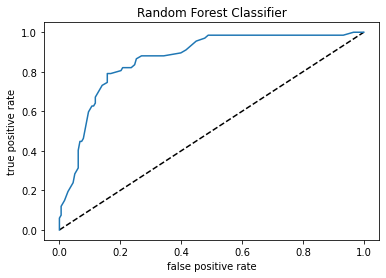

In [104]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [105]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

0.6165101458997149


Auc_score of Random Forest Classifier is 61%

In [106]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7795918367346939
[[156  22]
 [ 32  35]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       178
           1       0.61      0.52      0.56        67

    accuracy                           0.78       245
   macro avg       0.72      0.70      0.71       245
weighted avg       0.77      0.78      0.77       245



In [107]:
# For DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.786734693877551


In [189]:
# AUC ROC CURVE DECISION TREE CLASSIFIER
dt.fit(x_train,y_train)
y_pred_prob=dt.predict_proba(x_test)[:,1]


In [108]:
y_pred_prob

array([0.21, 0.54, 0.03, 0.08, 0.46, 0.11, 0.04, 0.42, 0.1 , 0.02, 0.52,
       0.12, 0.09, 0.33, 0.26, 0.37, 0.48, 0.57, 0.43, 0.08, 0.29, 0.37,
       0.18, 0.12, 0.27, 0.08, 0.4 , 0.36, 0.19, 0.36, 0.09, 0.35, 0.16,
       0.11, 0.27, 0.29, 0.44, 0.13, 0.05, 0.15, 0.25, 0.07, 0.51, 0.2 ,
       0.51, 0.32, 0.33, 0.1 , 0.26, 0.05, 0.23, 0.07, 0.11, 0.29, 0.14,
       0.14, 0.14, 0.24, 0.3 , 0.41, 0.24, 0.64, 0.29, 0.53, 0.1 , 0.19,
       0.13, 0.1 , 0.04, 0.14, 0.12, 0.1 , 0.62, 0.48, 0.09, 0.43, 0.21,
       0.04, 0.52, 0.13, 0.34, 0.23, 0.13, 0.56, 0.12, 0.05, 0.19, 0.21,
       0.07, 0.13, 0.23, 0.29, 0.11, 0.16, 0.17, 0.04, 0.12, 0.23, 0.59,
       0.14, 0.51, 0.17, 0.31, 0.26, 0.6 , 0.49, 0.07, 0.07, 0.06, 0.54,
       0.54, 0.24, 0.17, 0.17, 0.17, 0.04, 0.13, 0.19, 0.02, 0.1 , 0.19,
       0.25, 0.2 , 0.36, 0.49, 0.05, 0.53, 0.25, 0.43, 0.33, 0.13, 0.52,
       0.48, 0.56, 0.6 , 0.17, 0.05, 0.19, 0.2 , 0.16, 0.13, 0.28, 0.48,
       0.36, 0.42, 0.49, 0.22, 0.42, 0.42, 0.19, 0.

In [109]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.01492537, 0.05970149, 0.07462687, 0.08955224,
       0.11940299, 0.14925373, 0.19402985, 0.20895522, 0.23880597,
       0.28358209, 0.31343284, 0.40298507, 0.44776119, 0.44776119,
       0.46268657, 0.59701493, 0.62686567, 0.62686567, 0.64179104,
       0.67164179, 0.70149254, 0.73134328, 0.74626866, 0.76119403,
       0.79104478, 0.79104478, 0.80597015, 0.82089552, 0.82089552,
       0.82089552, 0.8358209 , 0.86567164, 0.88059701, 0.88059701,
       0.88059701, 0.88059701, 0.89552239, 0.91044776, 0.95522388,
       0.97014925, 0.98507463, 0.98507463, 0.98507463, 0.98507463,
       0.98507463, 0.98507463, 0.98507463, 0.98507463, 0.98507463,
       0.98507463, 0.98507463, 1.        , 1.        ])

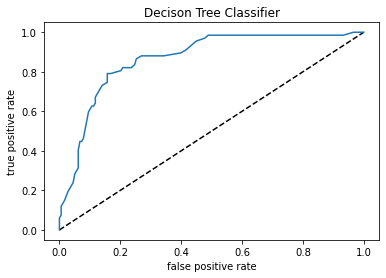

In [110]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decison Tree Classifier')
plt.show()

In [111]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

0.6993962770417576


Auc_score of Decision Tree Classifier is 69%

In [112]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6326530612244898
[[148  30]
 [ 60   7]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       178
           1       0.19      0.10      0.13        67

    accuracy                           0.63       245
   macro avg       0.45      0.47      0.45       245
weighted avg       0.57      0.63      0.59       245



In [113]:
# For GaussianNb cross validation
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6744897959183673


Accuracy score is 63% and cv score is 67% for gaussianNB

In [114]:
# AUC ROC CURVE GAUSSIANNB
gnb.fit(x_train,y_train)
y_pred_prob=gnb.predict_proba(x_test)[:,1]


In [115]:
y_pred_prob

array([0.42585495, 0.6051683 , 0.00254654, 0.25769446, 0.47439046,
       0.0041962 , 0.45135729, 0.35851774, 0.00356834, 0.17906288,
       0.41076111, 0.00254939, 0.24834319, 0.3150687 , 0.32024938,
       0.39152798, 0.43503293, 0.41123777, 0.27323171, 0.00153251,
       0.29809389, 0.40279115, 0.22349404, 0.03569366, 0.55234836,
       0.2419196 , 0.24681525, 0.18159856, 0.68452593, 0.25399197,
       0.34473984, 0.40076353, 0.30908401, 0.00580461, 0.38936786,
       0.25093711, 0.41021321, 0.4762452 , 0.00203047, 0.57230928,
       0.33676779, 0.24432612, 0.63363795, 0.32068966, 0.21093591,
       0.56621966, 0.24801529, 0.0043057 , 0.50679107, 0.0139972 ,
       0.00564172, 0.00345609, 0.33803259, 0.23177761, 0.41504164,
       0.00389232, 0.20777365, 0.62107871, 0.09495202, 0.22139827,
       0.25570529, 0.31618813, 0.36723397, 0.56919021, 0.50684588,
       0.56687045, 0.06414641, 0.03676251, 0.38408948, 0.42497716,
       0.56791381, 0.24886715, 0.29050566, 0.56138764, 0.38532

In [116]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.        , 0.        , 0.01492537, 0.01492537,
       0.02985075, 0.02985075, 0.04477612, 0.04477612, 0.05970149,
       0.05970149, 0.07462687, 0.07462687, 0.08955224, 0.08955224,
       0.10447761, 0.10447761, 0.13432836, 0.13432836, 0.14925373,
       0.14925373, 0.19402985, 0.19402985, 0.23880597, 0.23880597,
       0.26865672, 0.26865672, 0.28358209, 0.28358209, 0.29850746,
       0.29850746, 0.32835821, 0.32835821, 0.34328358, 0.34328358,
       0.37313433, 0.37313433, 0.41791045, 0.41791045, 0.43283582,
       0.43283582, 0.44776119, 0.44776119, 0.47761194, 0.47761194,
       0.49253731, 0.49253731, 0.53731343, 0.53731343, 0.55223881,
       0.55223881, 0.58208955, 0.58208955, 0.59701493, 0.59701493,
       0.6119403 , 0.6119403 , 0.62686567, 0.62686567, 0.64179104,
       0.64179104, 0.65671642, 0.65671642, 0.67164179, 0.67164179,
       0.68656716, 0.68656716, 0.70149254, 0.70149254, 0.71641791,
       0.71641791, 0.73134328, 0.73134328, 0.74626866, 0.74626

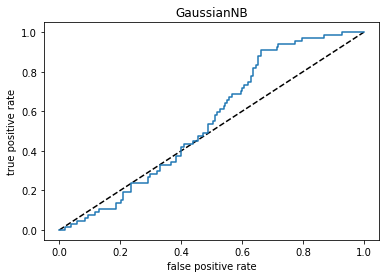

In [117]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('GaussianNB')
plt.show()

In [118]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

0.46796914304880094


Auc_score of GaussianNB is 46%.

In [119]:
# For k-nearest neighbor

kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.6816326530612244
[[162  16]
 [ 62   5]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       178
           1       0.24      0.07      0.11        67

    accuracy                           0.68       245
   macro avg       0.48      0.49      0.46       245
weighted avg       0.59      0.68      0.62       245



In [120]:
# For k-nearest neighbor cross validation
scr=cross_val_score(kn,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7051020408163265


Accuracy score is 68% and cv score is 70% for k-nearset neighbors.

In [121]:
# AUC ROC CURVE k-nearest neighbor
kn.fit(x_train,y_train)
y_pred_prob=gnb.predict_proba(x_test)[:,1]


In [122]:
y_pred_prob

array([0.42585495, 0.6051683 , 0.00254654, 0.25769446, 0.47439046,
       0.0041962 , 0.45135729, 0.35851774, 0.00356834, 0.17906288,
       0.41076111, 0.00254939, 0.24834319, 0.3150687 , 0.32024938,
       0.39152798, 0.43503293, 0.41123777, 0.27323171, 0.00153251,
       0.29809389, 0.40279115, 0.22349404, 0.03569366, 0.55234836,
       0.2419196 , 0.24681525, 0.18159856, 0.68452593, 0.25399197,
       0.34473984, 0.40076353, 0.30908401, 0.00580461, 0.38936786,
       0.25093711, 0.41021321, 0.4762452 , 0.00203047, 0.57230928,
       0.33676779, 0.24432612, 0.63363795, 0.32068966, 0.21093591,
       0.56621966, 0.24801529, 0.0043057 , 0.50679107, 0.0139972 ,
       0.00564172, 0.00345609, 0.33803259, 0.23177761, 0.41504164,
       0.00389232, 0.20777365, 0.62107871, 0.09495202, 0.22139827,
       0.25570529, 0.31618813, 0.36723397, 0.56919021, 0.50684588,
       0.56687045, 0.06414641, 0.03676251, 0.38408948, 0.42497716,
       0.56791381, 0.24886715, 0.29050566, 0.56138764, 0.38532

In [123]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.        , 0.        , 0.01492537, 0.01492537,
       0.02985075, 0.02985075, 0.04477612, 0.04477612, 0.05970149,
       0.05970149, 0.07462687, 0.07462687, 0.08955224, 0.08955224,
       0.10447761, 0.10447761, 0.13432836, 0.13432836, 0.14925373,
       0.14925373, 0.19402985, 0.19402985, 0.23880597, 0.23880597,
       0.26865672, 0.26865672, 0.28358209, 0.28358209, 0.29850746,
       0.29850746, 0.32835821, 0.32835821, 0.34328358, 0.34328358,
       0.37313433, 0.37313433, 0.41791045, 0.41791045, 0.43283582,
       0.43283582, 0.44776119, 0.44776119, 0.47761194, 0.47761194,
       0.49253731, 0.49253731, 0.53731343, 0.53731343, 0.55223881,
       0.55223881, 0.58208955, 0.58208955, 0.59701493, 0.59701493,
       0.6119403 , 0.6119403 , 0.62686567, 0.62686567, 0.64179104,
       0.64179104, 0.65671642, 0.65671642, 0.67164179, 0.67164179,
       0.68656716, 0.68656716, 0.70149254, 0.70149254, 0.71641791,
       0.71641791, 0.73134328, 0.73134328, 0.74626866, 0.74626

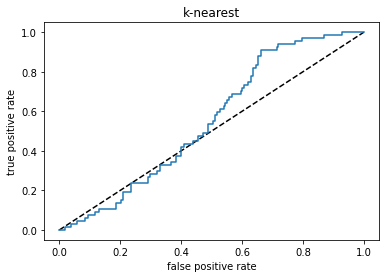

In [124]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='k-nearest neighbor')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('k-nearest')
plt.show()

In [125]:
auc_score=roc_auc_score(y_test,kn.predict(x_test))
print(auc_score)

0.4923696126111018


Auc_roc score is 49% k-nearest neighbor.

After checking accuracy ,cross validation and auc_score, we can say that our model is predicting well . I will go with Ada Boost Classifier because it is predicting 78% accuracy after  cross validation and difference between accuracy score and cross validation score is minimum., 

Tried to imporve model performance but on the most of random state getting approx 70% to 80% accuracy.

# HYPER PARAMETER TUNING OF MODEL

In [127]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV


ad=AdaBoostClassifier(n_estimators = 50, random_state=0)

grid_param={'algorithm':['SAMME', 'SAMME.R']}
           

gd_sr=GridSearchCV(estimator=ad,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'SAMME'}
0.7867346938775509


# FINAL MODEL

In [128]:
final_mod=AdaBoostClassifier(algorithm='SAMME')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.36734693877551


In [130]:
scr=cross_val_score(final_mod,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7867346938775509


Since the accuracy score is less than 80%, I am applying one more model that is Decision Tree for Hyper Parameter Tunning.

In [136]:
# Decision Tree
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier( random_state=0,max_depth=7,min_samples_leaf=13)

grid_param={'criterion':['ginny', 'entropy'],'splitter':['best','random']}
           

gd_sr=GridSearchCV(estimator=dt,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'entropy', 'splitter': 'best'}
0.8336734693877551


In [140]:
# Decision Tree

final_mod2=DecisionTreeClassifier(criterion='entropy',splitter='best')
final_mod2.fit(x_train,y_train)
pred=final_mod2.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.36734693877551


In [142]:
scr=cross_val_score(final_mod2,x,y,cv=5)
print('cross validation score',scr.mean())
print(scr*100)

cross validation score 0.783673469387755
[80.10204082 81.12244898 79.59183673 75.         76.02040816]


# SAVING THE MODEL

In [145]:
import pickle
filename='ins_fraud.pkl'
pickle.dump(dt, open(filename, 'wb'))

Above predictions from the model , we can say that our model is performing well, we are getting approx approx 79% accuracy from Adaboost Classifier and Decision Tree Classifier.